# TP SVM classification
Diane Lingrand (diane.lingrand@univ-cotedazur)

Université Nice Côte d'Azur 

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [1]:
#necessary imports
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, f1_score

## dataset: Iris

In [2]:
# loading the dataset
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
# split into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [4]:
print("train: ", y_train)
print("test: ", y_test)

train:  [2 2 2 0 0 0 0 0 2 1 1 0 2 0 1 0 2 2 2 0 0 2 1 1 1 0 1 0 0 0 2 0 0 0 1 1 2
 2 0 1 0 1 0 2 2 2 2 0 1 1 2 0 2 1 0 2 2 2 0 2 2 0 0 2 1 1 0 1 2 0 2 1 1 0
 0 1 0 0 1 2 1 2 1 0 0 1 0 2 2 2]
test:  [1 0 0 2 1 0 2 1 2 2 0 1 2 0 2 1 1 0 0 1 1 1 1 2 2 1 0 1 0 2 2 0 2 0 0 0 1
 1 1 2 1 0 2 2 1 1 1 1 2 2 1 1 1 1 2 1 2 1 2 0]


### classification of only 2 classes

In [5]:
# we choose to remove class with label 2 (Iris Virginica)
X_trainBinaire = X_train[y_train!=2]
y_trainBinaire = y_train[y_train!=2]
X_testBinaire = X_test[y_test!=2]
y_testBinaire = y_test[y_test!=2]


In [6]:
# verification that we have binary labels for only 2 classes
print("train: ", y_trainBinaire)
print("test: ", y_testBinaire)

train:  [0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0
 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 0]
test:  [1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 0]


In [7]:
#default constructor
mySvcBin = svm.SVC(kernel='linear')
#learning
time_start = time.perf_counter()
mySvcBin.fit(X_trainBinaire,y_trainBinaire)
time_elapsed = (time.perf_counter()-time_start)
print("learning done in %.2f seconds" %(time_elapsed))

learning done in 0.00 seconds


F1 score :  1.0


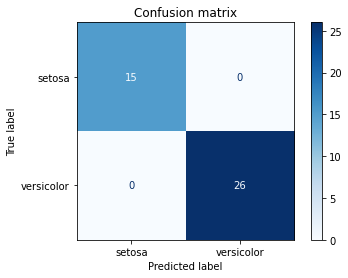

In [8]:
#test performances
y_predBinaire = mySvcBin.predict(X_testBinaire)

disp = plot_confusion_matrix(mySvcBin, X_testBinaire, y_testBinaire,
                                 display_labels=list(iris.target_names)[0:2],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Confusion matrix')
print("F1 score : ", f1_score(y_predBinaire,y_testBinaire))

### classification of all classes

In [9]:
#default constructor
mySvc = svm.SVC(kernel='linear', C=4,decision_function_shape='ovo')
#learning
time_start = time.perf_counter()
mySvc.fit(X_train,y_train)
time_elapsed = (time.perf_counter()-time_start)
print("learning done in %.2f seconds" %(time_elapsed))
# </div><i class="fa fa-lightbulb-o "></i>

learning done in 0.00 seconds


F1 score :  [1.   0.96 0.95]


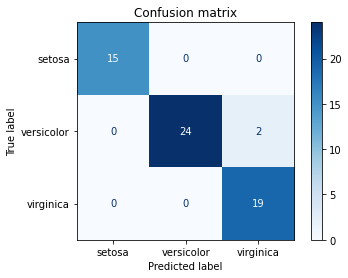

In [10]:
#test performances
y_pred = mySvc.predict(X_test)

disp = plot_confusion_matrix(mySvc, X_test, y_test,
                                 display_labels=list(iris.target_names),
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Confusion matrix')
print("F1 score : ", f1_score(y_pred,y_test,average=None))

Can we do it better? Try other kernels, other hyper-parameters (C, ...)

</div>
    <p color= 'red'>
      <i class="fa fa-lightbulb-o "></i>
    .
    </p>
</div>

### My trials

Try other kernels, other hyper-parameters (C, ...), 'ovo' or 'ovr' for the multiclass problem.

In [11]:
# sigmoid linear rbf poly guassian 

learning done in 0.00 seconds
F1 score :  [0.9375     0.93877551 0.97435897]


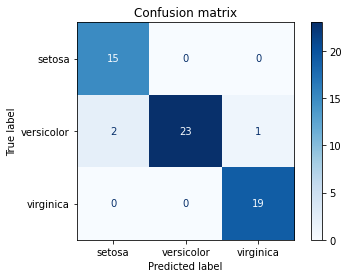

In [12]:
## play here
# ovo and ovr are giving the same results
#default constructor
mySvc = svm.SVC(kernel='poly', C=0.01,decision_function_shape='ovo')
#learning
time_start = time.perf_counter()
mySvc.fit(X_train,y_train)
time_elapsed = (time.perf_counter()-time_start)
print("learning done in %.2f seconds" %(time_elapsed))
# </div><i class="fa fa-lightbulb-o "></i>

###
#test performances
y_pred = mySvc.predict(X_test)

disp = plot_confusion_matrix(mySvc, X_test, y_test,
                                 display_labels=list(iris.target_names),
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Confusion matrix')
print("F1 score : ", f1_score(y_pred,y_test,average=None))

learning done in 0.00 seconds
F1 score :  [1.         0.14285714 0.61290323]


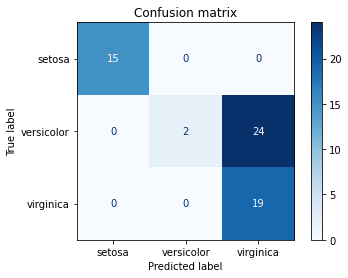

In [13]:
## play here
# ovo and ovr are giving the same results
#default constructor
mySvc = svm.SVC(kernel='linear', C=0.01,decision_function_shape='ovo')
#learning
time_start = time.perf_counter()
mySvc.fit(X_train,y_train)
time_elapsed = (time.perf_counter()-time_start)
print("learning done in %.2f seconds" %(time_elapsed))
# </div><i class="fa fa-lightbulb-o "></i>

###
#test performances
y_pred = mySvc.predict(X_test)

disp = plot_confusion_matrix(mySvc, X_test, y_test,
                                 display_labels=list(iris.target_names),
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Confusion matrix')
print("F1 score : ", f1_score(y_pred,y_test,average=None))

learning done in 0.00 seconds
F1 score :  [1.   0.96 0.95]


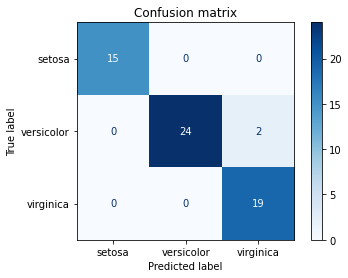

In [14]:
## play here
#default constructor
mySvc = svm.SVC(kernel='linear', C=4,decision_function_shape='ovo')
#learning
time_start = time.perf_counter()
mySvc.fit(X_train,y_train)
time_elapsed = (time.perf_counter()-time_start)
print("learning done in %.2f seconds" %(time_elapsed))
# </div><i class="fa fa-lightbulb-o "></i>

###
#test performances
y_pred = mySvc.predict(X_test)

disp = plot_confusion_matrix(mySvc, X_test, y_test,
                                 display_labels=list(iris.target_names),
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Confusion matrix')
print("F1 score : ", f1_score(y_pred,y_test,average=None))

learning done in 0.00 seconds
F1 score :  [1.         0.14285714 0.61290323]


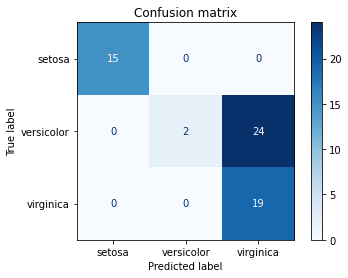

In [15]:
## play here

mySvc = svm.SVC(kernel='linear', C=0.01,decision_function_shape='ovo')
#learning
time_start = time.perf_counter()
mySvc.fit(X_train,y_train)
time_elapsed = (time.perf_counter()-time_start)
print("learning done in %.2f seconds" %(time_elapsed))
# </div><i class="fa fa-lightbulb-o "></i>

###
#test performances
y_pred = mySvc.predict(X_test)

disp = plot_confusion_matrix(mySvc, X_test, y_test,
                                 display_labels=list(iris.target_names),
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Confusion matrix')
print("F1 score : ", f1_score(y_pred,y_test,average=None))

learning done in 0.00 seconds
F1 score :  [1.   0.96 0.95]


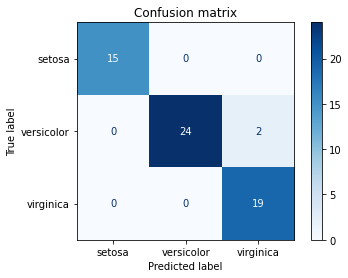

In [16]:
## play here

mySvc = svm.SVC(kernel='linear', C=1,decision_function_shape='ovr')
#learning
time_start = time.perf_counter()
mySvc.fit(X_train,y_train)
time_elapsed = (time.perf_counter()-time_start)
print("learning done in %.2f seconds" %(time_elapsed))
# </div><i class="fa fa-lightbulb-o "></i>

###
#test performances
y_pred = mySvc.predict(X_test)

disp = plot_confusion_matrix(mySvc, X_test, y_test,
                                 display_labels=list(iris.target_names),
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Confusion matrix')
print("F1 score : ", f1_score(y_pred,y_test,average=None))

## dataset: MNIST

In [17]:
#necessary imports
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, f1_score

In [18]:
# reading the dataset
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

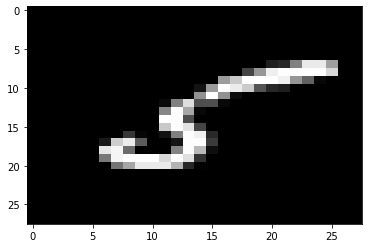

5


In [19]:
#display one of the pictures (the 11th in this code)
import matplotlib.pyplot as plt
i = 11 #index of the image: change it in order to display other images
plt.imshow(x_train[i],aspect="auto",cmap='gray')
plt.show()
print(y_train[i])

In [20]:
# case of binary classification: we choose coats and bags

# you can change the classes
class1 = 4 #negative class 'coats'
class2 = 8 #positive class 'bags'
nameClass1 = '4'
nameClass2 = '8'
mesClassesTrain = (y_train==class1)|(y_train==class2)
mesClassesTest = (y_test==class1)|(y_test==class2)

## TRAIN
x_trainBinaire = np.array(x_train[mesClassesTrain,:])
y_trainBinaire = np.array((y_train[mesClassesTrain]-class1)/(class2-class1))

## TEST
x_testBinaire = np.array(x_test[mesClassesTest,:])
y_testBinaire = np.array((y_test[mesClassesTest]-class1)/(class2-class1))

In [21]:
# reshaping the data (a 2d image is transformed to a 1d array)
#train
n = x_trainBinaire.shape[0]
x_trainBinaireLin = x_trainBinaire.reshape(n,-1)
# y_trainBinaireLin = y_trainBinaire.reshape(n,-1)
#test
n = x_testBinaire.shape[0]
x_testBinaireLin = x_testBinaire.reshape(n,-1)

In [22]:
#default constructor
## your job is to build a SVC classifier
#learning
time_start = time.perf_counter()
## your job is to train your SVC classifier 

mySvc_mn = svm.SVC(kernel='linear', C=0.01 , decision_function_shape='ovo')
#learning
time_start = time.perf_counter()
mySvc_mn.fit(x_trainBinaireLin , y_trainBinaire)


time_elapsed = (time.perf_counter()-time_start)
print("learning done in %.2f seconds" %(time_elapsed))

learning done in 2.57 seconds


F1 score :  0.9927835051546392


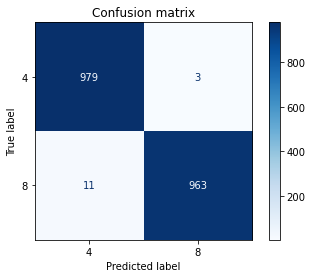

In [23]:
## compute the prediction of x_testBinaireLin using your learned classifier

y_predBinaireTest = mySvc_mn.predict(x_testBinaireLin)

disp = plot_confusion_matrix(mySvc_mn, x_testBinaireLin, y_testBinaire,
                                 display_labels=[nameClass1,nameClass2],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Confusion matrix')
print("F1 score : ", f1_score(y_predBinaireTest,y_testBinaire))

Same question as for the Iris dataset: can you improve the results by tuning hyper-parameters or changing the kernel ?

## The whole dataset with the 10 classes

In [24]:
# your turn!
# reshaping the data (a 2d image is transformed to a 1d array)
#train
n = x_train.shape[0]
x_trainLin = x_train.reshape(n,-1)
#test
n = x_test.shape[0]
x_testLin = x_test.reshape(n,-1)

In [25]:
#default constructor
### your job is ....
mysvc = svm.SVC(kernel='linear', C=1)#,decision_function_shape='ovr')
#learning
time_start = time.perf_counter()
### your job is ...
mysvc.fit(x_trainLin, y_train)
time_elapsed = (time.perf_counter()-time_start)
print("learning done in %.2f seconds" %(time_elapsed))

learning done in 174.65 seconds


F1 score :  [0.96423174 0.97905759 0.9311507  0.9216545  0.94768612 0.90734463
 0.95337873 0.94146581 0.91832461 0.93084301]


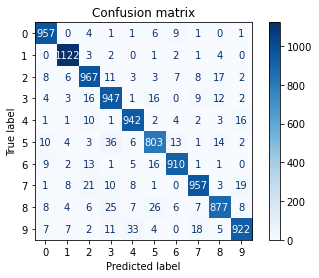

In [26]:
y_predTest = mysvc.predict(x_testLin) ##theNameOfYourClassifier.predict(x_testLin)

disp = plot_confusion_matrix(mysvc, x_testLin, y_test, ##theNameOfYourClassifier, x_testLin, y_test,
                                 display_labels=['0','1','2','3','4','5','6', '7', '8', '9'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Confusion matrix')
print("F1 score : ", f1_score(y_predTest,y_test, average=None))

In [ ]:
from sklearn.model_selection import GridSearchCV
paramGrid = [
{'C':[0.1, 0.2, 0.5, 1, 2, 5, 10], 'kernel':['linear']},
{'C':[0.5, 1, 5, 10],'degree':[2,3],'coef0':[-1,0,1],'kernel':['poly']}
]
searchBestParams = GridSearchCV(svm.SVC(), paramGrid, scoring='precision_macro')
searchBestParams.fit(x_trainLin, y_train)
#searchBestParams
means = searchBestParams.cv_results_['mean_test_score']
stds = searchBestParams.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, searchBestParams.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

C:\Users\hadik\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hadik\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hadik\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hadik\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedM

In [ ]:
# using the best set of parameters, learn the SVM classifier (whole train set)
C = 
kernel = ''

## Do you obtain the same results with FMNIST ? (fashion MNIST)

In [ ]:
# your turn!

## Active learning with SVM

Start with few annoted data and iterate by asking new labelled data and re-learn SVM separation. Try different selection of new labelled data.

## Reduction of the dataset

Suffle and divide the train dataset by 2 multiple time. For each division, learn a SVM classifier and test the performances.

## Classification of images

Represent the images using a deep CNN and perform the classification using SVM. 